# TO DO: solve the outliers - get rid of outliers based on statistical custom

### First, joing the test and train data into one, to split them and train the coding

In [196]:
import pandas as pd
import seaborn as sns

In [197]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")

In [198]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [199]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [200]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [201]:
union_df = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [202]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 157.7+ KB


In [203]:
union_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [204]:
data = union_df.copy()

In [205]:
data.describe(include="all")

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,2521.000000,2521.000000,2521.000000,2521,2097.000000,2097,2521.000000,2.521000e+03
unique,NaN,NaN,NaN,1,NaN,2,NaN,NaN
top,NaN,NaN,NaN,sqft,NaN,sqft,NaN,NaN
freq,NaN,NaN,NaN,2521,NaN,1818,NaN,NaN
mean,2.877033,2.171956,1758.998017,NaN,3896.245794,NaN,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,NaN,2714.651578,NaN,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,NaN,0.230000,NaN,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,NaN,1263.000000,NaN,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,NaN,4001.000000,NaN,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,NaN,6000.000000,NaN,98126.000000,1.115000e+06


In [206]:
data["size_units"].value_counts()

size_units
sqft    2521
Name: count, dtype: int64

In [207]:
data["lot_size_units"].value_counts()

lot_size_units
sqft    1818
acre     279
Name: count, dtype: int64

##### I have to change the units to the same units, but first lets drop the column not needed.

In [208]:
data.drop(columns=["zip_code","size_units"], inplace=True)

In [209]:
data.isnull().sum()

beds                0
baths               0
size                0
lot_size          424
lot_size_units    424
price               0
dtype: int64

##### What is the proportion potentially dropped?

In [210]:
424/2521

0.16818722729075763

In [211]:
data.dropna(axis=0, inplace=True)

In [212]:
data_no_missing_values = data.copy()

In [213]:
data_no_missing_values.head()

,beds,baths,size,lot_size,lot_size_units,price
0,3,2.5,2590.0,6000.00,sqft,795000.0
1,4,2.0,2240.0,0.31,acre,915000.0
2,4,3.0,2040.0,3783.00,sqft,950000.0
3,4,3.0,3800.0,5175.00,sqft,1950000.0
5,2,2.0,1190.0,1.00,acre,740000.0


In [214]:
conversion_factors = {
    'acre': 43560,
    'sqm': 10.7639,
    'sqft': 1
}

data_no_missing_values["lot_size_in_sqft"] = data_no_missing_values.apply (lambda row: row["lot_size"] * conversion_factors.get(row["lot_size_units"], 1), axis=1)

In [215]:
data_no_missing_values.columns

Index(['beds', 'baths', 'size', 'lot_size', 'lot_size_units', 'price',
       'lot_size_in_sqft'],
      dtype='object')

In [216]:
data_no_missing_values.drop(columns=['lot_size', 'lot_size_units'], axis=1, inplace=True)

In [217]:
data_no_missing_values.rename(columns={"size": "size_in_sqft"}, inplace=True)

In [218]:
data_no_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              2097 non-null   int64  
 1   baths             2097 non-null   float64
 2   size_in_sqft      2097 non-null   float64
 3   price             2097 non-null   float64
 4   lot_size_in_sqft  2097 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 98.3 KB


In [219]:
data_no_missing_values.describe(include="all")

,beds,baths,size_in_sqft,price,lot_size_in_sqft
count,2097.000000,2097.000000,2097.000000,2.097000e+03,2.097000e+03
mean,3.137339,2.305436,1916.727706,1.039809e+06,1.678385e+04
std,1.175945,1.010824,915.073679,9.415656e+05,2.571518e+05
min,1.000000,0.500000,250.000000,1.590000e+05,5.000000e+02
25%,2.000000,1.500000,1280.000000,6.850000e+05,3.000000e+03
50%,3.000000,2.000000,1740.000000,8.700000e+05,5.000000e+03
75%,4.000000,3.000000,2390.000000,1.180000e+06,7.407000e+03
max,15.000000,9.000000,11010.000000,2.500000e+07,1.089000e+07


### Here I have the data prepared for the final preprocessing - outliers cut.

In [220]:
data_clean = data_no_missing_values.copy()

In [221]:
sns.set_theme(style="darkgrid")

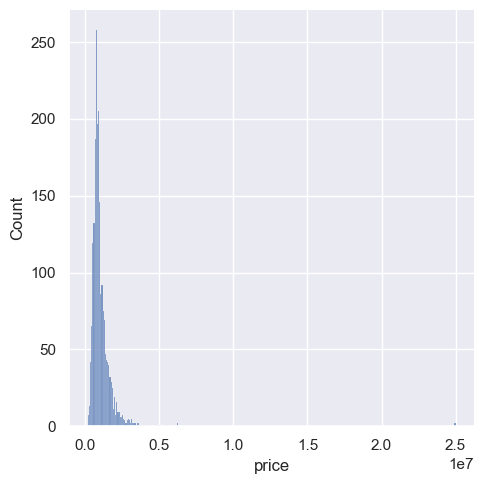

In [222]:
sns.displot(data_clean["price"])

##### Lets drop 1 % of outliers based on price.

In [223]:
q = data_clean["price"].quantile(0.99)
q

3320799.999999999

In [224]:
data_clean[data_clean["price"] < q].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2076 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              2076 non-null   int64  
 1   baths             2076 non-null   float64
 2   size_in_sqft      2076 non-null   float64
 3   price             2076 non-null   float64
 4   lot_size_in_sqft  2076 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 97.3 KB


In [225]:
data_price_outliers = data_clean[data_clean["price"] < q]

In [226]:
data_price_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2076 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              2076 non-null   int64  
 1   baths             2076 non-null   float64
 2   size_in_sqft      2076 non-null   float64
 3   price             2076 non-null   float64
 4   lot_size_in_sqft  2076 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 97.3 KB


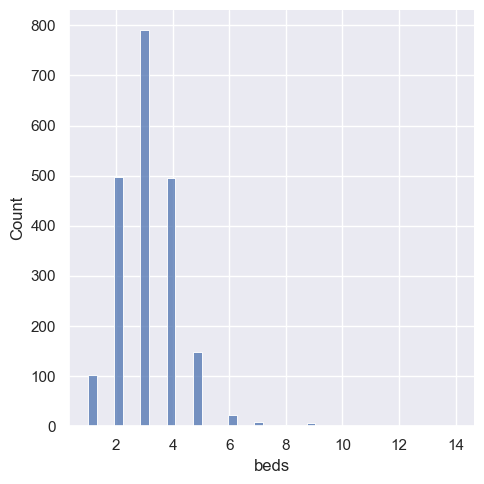

In [227]:
sns.displot(data_price_outliers["beds"])

##### I will keep the beds, since it is topped by about 14 rooms.

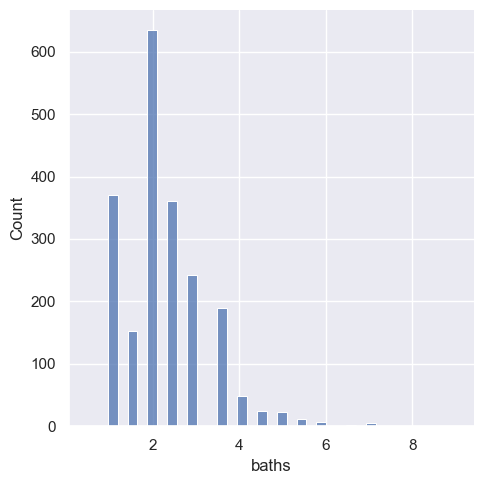

In [228]:
sns.displot(data_price_outliers["baths"])

##### I will keep the baths, since it is topped by about 8-10 baths

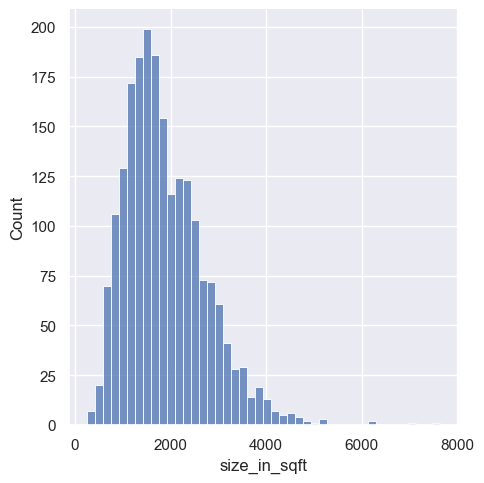

In [229]:
sns.displot(data_price_outliers["size_in_sqft"])

In [230]:
q = data_price_outliers["size_in_sqft"].quantile(0.99)
q

4393.75

In [231]:
data_size_in_sqt_outliers = data_price_outliers[data_price_outliers["size_in_sqft"] < q]

In [232]:
data_size_in_sqt_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              2055 non-null   int64  
 1   baths             2055 non-null   float64
 2   size_in_sqft      2055 non-null   float64
 3   price             2055 non-null   float64
 4   lot_size_in_sqft  2055 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 96.3 KB


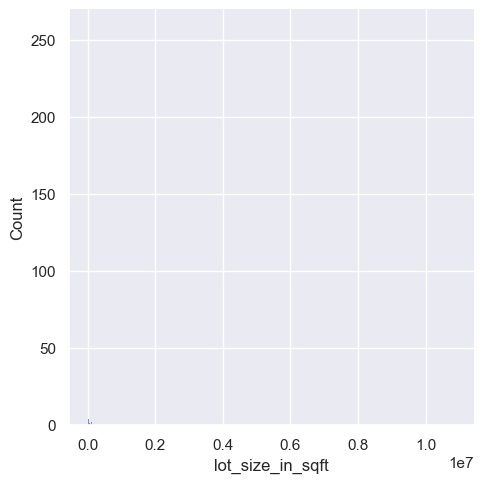

In [233]:
sns.displot(data_size_in_sqt_outliers["lot_size_in_sqft"])

In [234]:
data_size_in_sqt_outliers["lot_size_in_sqft"].describe()

count    2.055000e+03
mean     1.689156e+04
std      2.597603e+05
min      5.000000e+02
25%      2.914500e+03
50%      5.000000e+03
75%      7.283000e+03
max      1.089000e+07
Name: lot_size_in_sqft, dtype: float64

In [235]:
q = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.99)
q

172933.2

In [236]:
data_prepro = data_size_in_sqt_outliers[data_size_in_sqt_outliers["lot_size_in_sqft"] < q]
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              2033 non-null   int64  
 1   baths             2033 non-null   float64
 2   size_in_sqft      2033 non-null   float64
 3   price             2033 non-null   float64
 4   lot_size_in_sqft  2033 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 95.3 KB


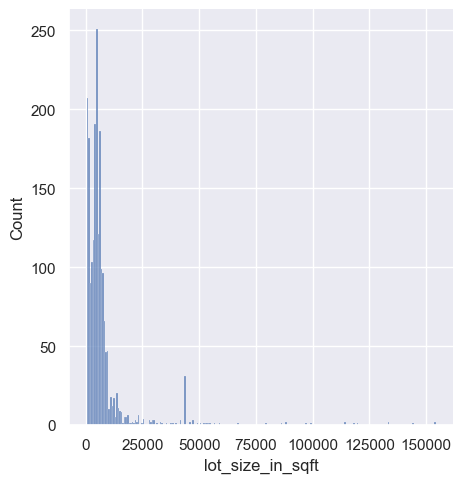

In [238]:
sns.displot(data_prepro["lot_size_in_sqft"])

In [240]:
data_prepro.describe(include="all")

,beds,baths,size_in_sqft,price,lot_size_in_sqft
count,2033.000000,2033.000000,2033.000000,2.033000e+03,2033.000000
mean,3.111166,2.270290,1863.420561,9.790085e+05,7331.740974
std,1.116465,0.961801,784.089688,4.654295e+05,12257.306505
min,1.000000,0.500000,376.000000,1.594880e+05,500.000000
25%,2.000000,1.500000,1280.000000,6.850000e+05,2856.000000
50%,3.000000,2.000000,1730.000000,8.650000e+05,5000.000000
75%,4.000000,3.000000,2360.000000,1.160000e+06,7200.000000
max,14.000000,9.000000,4385.000000,3.300000e+06,154202.400000
